In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
titanic= sns.load_dataset('titanic')

In [3]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

C:\Users\bindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

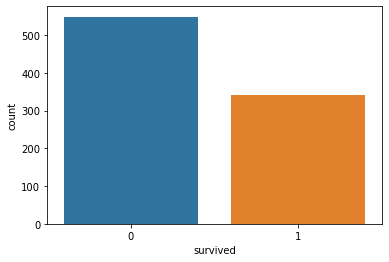

In [7]:
sns.countplot( titanic['survived'] )

In [8]:
cols=['who','sex','pclass','sibsp','parch','embarked']
n_rows=2
n_cols=3


C:\Users\bindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bindu\anaconda3\lib\si

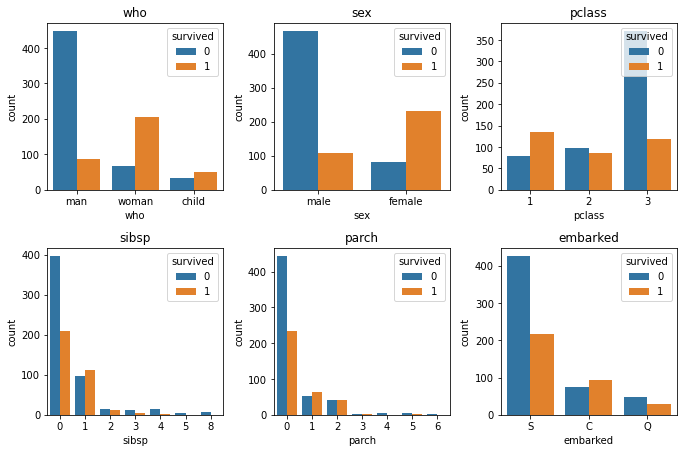

In [9]:
fig, axs=plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2, n_rows*3.2))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i=r*n_cols+ c
        ax=axs[r][c]
        sns.countplot(titanic[cols[i]], hue=titanic['survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc='upper right')
    plt.tight_layout()

In [10]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [11]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

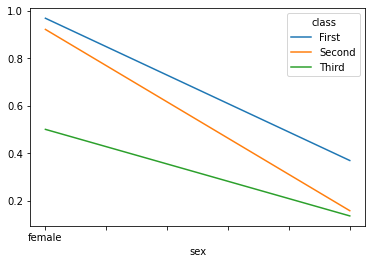

In [12]:
titanic.pivot_table('survived',index='sex',columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

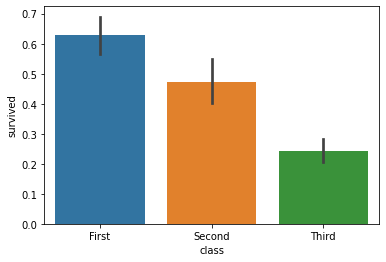

In [13]:
sns.barplot(x='class', y='survived', data=titanic)

In [14]:
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

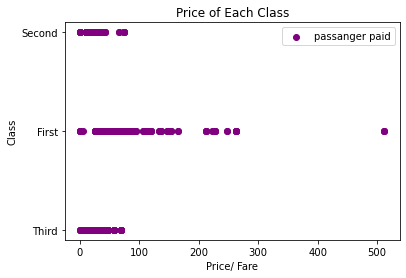

In [15]:
plt.scatter(titanic['fare'], titanic['class'],color='purple', label='passanger paid')
plt.ylabel('Class')
plt.xlabel('Price/ Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [16]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [18]:
titanic= titanic.dropna(subset = ['embarked','age'])

In [19]:
titanic.shape

(712, 15)

In [20]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

In [22]:
titanic.iloc[:, 2]=labelencoder.fit_transform(titanic.iloc[:, 2].values)
titanic.iloc[:, 7]=labelencoder.fit_transform(titanic.iloc[:, 7].values)


In [23]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique)

[1 0]
<bound method Series.unique of 0      2
1      0
2      2
3      2
4      2
      ..
885    1
886    2
887    2
889    0
890    1
Name: embarked, Length: 712, dtype: int32>


In [24]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique)

[1 0]
<bound method Series.unique of 0      2
1      0
2      2
3      2
4      2
      ..
885    1
886    2
887    2
889    0
890    1
Name: embarked, Length: 712, dtype: int32>


In [25]:
titanic.dtypes

survived          int64
pclass            int64
sex               int32
age             float64
sibsp             int64
parch             int64
fare            float64
embarked          int32
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [26]:
X=titanic.iloc[:, 1:8].values
Y=titanic.iloc[:, 0].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [74]:
def models(X_train, Y_train):
    
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state= 0)
    log.fit(X_train, Y_train)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p=2)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [38]:
from sklearn.svm import SVC
svc_lin = SVC(kernel='linear', random_state= 0)
svc_lin.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [32]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel='rbf', random_state= 0)
svc_rbf.fit(X_train, Y_train)

SVC(random_state=0)

In [42]:
from sklearn.naive_bayes import GaussianNB
gauss= GaussianNB()
gauss.fit(X_train, Y_train)

GaussianNB()

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(criterion ='entropy',random_state=0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(criterion ='entropy',random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [65]:
model = models(X_train, Y_train)

In [67]:
print('[1]K Neighbors Regression Training Accuracy:', knn.score(X_train, Y_train))
print('[2]SVC Linear Training Accuracy:', svc_lin.score(X_train, Y_train))
print('[3]SVC RBF Training Accuracy:', svc_rbf.score(X_train, Y_train))
print('[4]Gaussian NB Training Accuracy:', gauss.score(X_train, Y_train))
print('[5]Desicion Tree Training Accuracy:', tree.score(X_train, Y_train))
print('[6]Random Forest Training Accuracy:', forest.score(X_train, Y_train))


[1]K Neighbors Regression Training Accuracy: 0.8664323374340949
[2]SVC Linear Training Accuracy: 0.7768014059753954
[3]SVC RBF Training Accuracy: 0.8506151142355008
[4]Gaussian NB Training Accuracy: 0.8031634446397188
[5]Desicion Tree Training Accuracy: 0.9929701230228472
[6]Random Forest Training Accuracy: 0.9929701230228472


In [73]:
from sklearn.metrics import confusion_matrix


for i in range( len(model) ):
    cm=confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN,FP,FN,TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score= (TP+TN) / (TP+TN+FN+FP)
    
print(cm)
print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score))
print()

TypeError: object of type 'NoneType' has no len()

In [75]:
forest= model[6]
importances = pd.DataFrame({'feature:' titanic.iloc[:, 1:8.columns, 'importance': np.round(forest.feature_importances_, 3)]})
importances = importances.sort_values('importance', ascending= False).set_index('feature')
importances

SyntaxError: invalid syntax (Temp/ipykernel_21460/3302943555.py, line 2)